Python Einführungskurs | [Startseite](index.ipynb)

---

# 04 - Numerik mit Numpy

- [Numpy Arrays erstellen](#Numpy-Arrays-erstellen)
- [Aufgabe 1 - Numpy Arrays](#Aufgabe-1---Numpy-Arrays)
- [Aufgabe 2 - Slicing](#Aufgabe-2---Slicing)
- [Funktionen auf Arrays anwenden](#Funktionen-auf-Arrays-anwenden)
- [Daten einlesen und speichern](#Daten-einlesen-und-speichern)
- [Aufgabe 3 - Temperaturen in Heidelberg](#Aufgabe-3---Temperaturen-in-Heidelberg)

Python Listen sind sehr flexibel, da sie Werte unterschiedlicher Datentypen beinhalten können und einfach verändert werden können (bspw. mit `append`). Diese Flexibilität geht jedoch auf Kosten der Performance, sodass Listen für numerische Berechnungen nicht ideal sind.

Das **Numpy** Modul definiert daher den n-dimensionalen **Array** Datentyp `numpy.ndarray`, der für numerische Berechnungen auf höchst performanten C und Fortran Code zurückgreift.

Arrays können nur Werte eines einzelnen numerischen Datentyps (bspw. floating point Werte) enthalten und sind sehr viel starrer als Listen. Dies ist jedoch für viele wissenschaftliche Anwendung, wie die Arbeit mit Datensätzen, genau was wir brauchen!

Wir importieren das Numpy Modul per Konvention unter der Abkürzung `np`:

In [1]:
import numpy as np # Das Numpy Modul wird per Konvention als `np` abgekürzt

## Numpy Arrays erstellen

Am einfachsten erstellen wir Numpy Arrays aus Python Listen, indem wir die `numpy.array` Funktion verwenden:

In [2]:
a = np.array([ 1, 2, 3, 5, 8, 13 ])
a

array([ 1,  2,  3,  5,  8, 13])

In [3]:
b = np.array([ [ 1.5, 2.2, 3.1 ], [ 4.0, 5.2, 6.7 ] ])
b

array([[1.5, 2.2, 3.1],
       [4. , 5.2, 6.7]])

Numpy Arrays haben einige **Attribute**, die hilfreiche Informationen über das Array geben:

In [4]:
a.ndim, b.ndim # Die Zahl der Dimensionen des Arrays

(1, 2)

In [5]:
a.shape, b.shape # Die Länge des Arrays in jeder Dimension

((6,), (2, 3))

In [6]:
a.dtype, b.dtype # Der Datentyp des Arrays

(dtype('int32'), dtype('float64'))

> **Erinnerung:** Verwendet die `<TAB>`-Autovervollständigung und die `?`-Dokumentation im Jupyter Notebook wenn ihr nicht wisst, welche Funktionen es gibt oder was diese bewirken!

### Es gibt viele Möglichkeiten, Arrays zu erstellen

- Die `numpy.arange` Funktion arbeitet ähnlich wie Python's `range` Funktion, kann jedoch auch floating-point Argumente annehmen:

In [7]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.arange(1.5, 2, 0.1)

array([1.5, 1.6, 1.7, 1.8, 1.9])

- Außerdem sehr hilfreich sind `numpy.linspace` und `numpy.logspace`, welche eine Anzahl von Werten in linearem oder logarithmischem Abstand zwischen zwei Zahlen generiert:

In [9]:
np.linspace(10, 20, 4)

array([10.        , 13.33333333, 16.66666667, 20.        ])

In [10]:
np.logspace(1, 3, 4)

array([  10.        ,   46.41588834,  215.443469  , 1000.        ])

- Wir können mit `numpy.zeros` und `numpy.ones` Arrays erstellen, die mit Nullen oder Einsen gefüllt sind. Indem wir dem Argument `shape` dieser Funktionen statt einem Integer einen Tupel übergeben, können wir auch mehrdimensionale Arrays erzeugen:

In [11]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [12]:
np.ones((5, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

## Mit Arrays rechnen

Arrays können mit den Standardoperatoren `+-*/**` **elementweise** kombiniert werden:

In [13]:
x = np.array([1,2,3])
y = np.array([4,5,6])

In [14]:
x + 2 * y

array([ 9, 12, 15])

In [15]:
x ** y

array([  1,  32, 729], dtype=int32)

> **Achtung:** Für Python-Listen sind diese Operatoren völlig anders definiert!

## Funktionen auf Arrays anwenden

Während Funktionen aus dem `math` Modul wie `sin` oder `exp` auf Zahlen anwendbar sind, sind die gleichnamigen Funktionen aus dem `numpy` Modul auf Arrays anwendbar. **Die Funktion wird auf alle Element des Arrays** angewendet und ist typischerweise um einiges schneller als jedes Element einzeln zu berechnen:

In [16]:
phi = np.linspace(0, 2*np.pi, 10) # 10 Werte zwischen 0 und 2π
np.sin(phi) # Der Sinus jedes dieser Werte

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

Außerdem gibt es viele Funktionen, die Eigenschaften eines Arrays berechnen:

In [17]:
x = np.linspace(0, 10, 100)
np.sum(x), np.mean(x), np.std(x)

(500.0, 5.0, 2.9157646512850626)

Diese Funktionen generalisieren auf mehrere Dimensionen, indem die Achse angegeben wird, auf der die Berechnung durchgeführt werden soll:

In [18]:
x = np.array([ [ 1, 2 ], [ 3, 4 ] ])
np.sum(x), np.sum(x, axis=0), np.sum(x, axis=1)

(10, array([4, 6]), array([3, 7]))

## Aufgabe 1 - Numpy Arrays

a) Erstelle ein Array `a`, das 11 Werte zwischen $10^{-20}$ und $10^{-10}$ in logarithmischem Abstand enthält.

In [19]:
a = np.logspace(-20, -10, 11)

In [20]:
from numpy.testing import assert_array_equal
try:
    a
except NameError:
    raise NameError("Es gibt keine Variable 'a'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(a, [1.00000000e-20, 1.00000000e-19, 1.00000000e-18, 1.00000000e-17, 1.00000000e-16, 1.00000000e-15, 1.00000000e-14, 1.00000000e-13, 1.00000000e-12, 1.00000000e-11, 1.00000000e-10])
print("Jup.")

Jup.


b) Erstelle ein Array `b`, das 2x10 Nullen enthält.

**Hinweis:** Verwende die passende Funktion, die `numpy` bereitstellt.

In [21]:
b = np.zeros((2, 10))

In [22]:
from numpy.testing import assert_array_equal
try:
    b
except NameError:
    raise NameError("Es gibt keine Variable 'b'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(b, [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Gut.")

Gut.


c) Erstelle ein Array `c`, das der Einheitsmatrix in 3 Dimensionen entspricht.

**Hinweis:** Auch hier stellt `numpy` bereits eine passende Funktion bereit.

In [23]:
c = np.identity(3)

In [24]:
from numpy.testing import assert_array_equal
try:
    c
except NameError:
    raise NameError("Es gibt keine Variable 'c'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(c, [[1,0,0],[0,1,0],[0,0,1]])
print("Richtig.")

Richtig.


d) Erstelle ein Array `d`, das $100$ Werte zwischen $-5$ und $5$ in linearem Abstand enthält. Dies wird eine Raumachse darstellen.

In [25]:
d = np.linspace(-5, 5, 100)

In [26]:
from numpy.testing import assert_array_almost_equal
try:
    d
except NameError:
    raise NameError("Es gibt keine Variable 'd'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(d[:5], [-5., -4.8989899, -4.7979798, -4.6969697, -4.5959596], 4)
print("Stimmt.")

Stimmt.


e) Erstelle zwei zweidimensionale Arrays `x` und `y`, die jeweils in einer Richtung konstant sind und in der anderen die Raumachse `d` enthalten. So können wir gleich mit Koordinaten arbeiten.

**Hinweis:** Versuche, die Funktion `numpy.meshgrid` zu verstehen. Schreib dann `x, y = np.meshgrid(d, d)`.

In [27]:
#np.meshgrid?
### BEGIN SOLUTION
X= np.linspace(0, 5, 6)
Y= np.linspace(1, 7, 7)
x, y = np.meshgrid(X, Y)
### END SOLUTION
print(x)
print(y)

[[0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]
 [0. 1. 2. 3. 4. 5.]]
[[1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7.]]


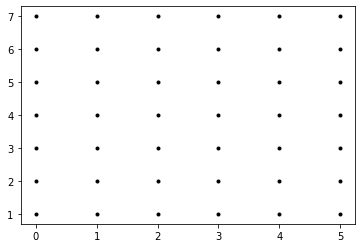

In [28]:
# Zeige Plots direkt im Jupyter Notebook an
%matplotlib inline
#%matplotlib notebook
# Anschließend können wir das Modul importieren
import matplotlib.pyplot as plt # Die Abkürzung `plt` ist Konvention

plt.plot(x,y, marker='.', color='k', linestyle='none')
from mpl_toolkits.mplot3d import Axes3D  
plt.show()

In [29]:
#%matplotlib notebook

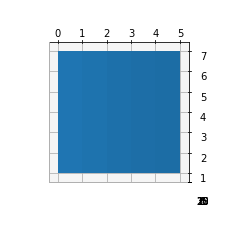

In [30]:
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')# https://stackoverflow.com/questions/23840756/how-to-disable-perspective-in-mplot3d/49856771#49856771


def fun(x, y):
    return x**2 + y

zs = np.array(fun(np.ravel(x), np.ravel(y)))
Z = zs.reshape(x.shape)

ax.plot_surface(x, y, Z)
ax.view_init(azim=-90, elev=90)# xy-axes as above => z-axis point out of display plane

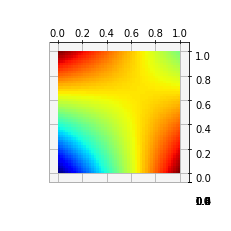

In [31]:
## based on matlab code from: https://en.wikipedia.org/wiki/File:Bilininterp.png
# Grid of known points:
x= (0,1)
y= (0,1)
X, Y = np.meshgrid(x, y)
# Grid for interpolated values:
xi= np.linspace(0, 1, 1001)
yi= np.linspace(0, 1, 1001)
XI, YI = np.meshgrid(xi, yi)
# Known values to interpolate from:
Z = (0, 1, 1, 0.5)
# Do bilinear interpolation
# matlab: ZI = interp2(X,Y,Z,XI,YI);
from scipy.interpolate import interp2d
fun = interp2d(x, y, Z, kind='linear') # https://stackoverflow.com/questions/8661537/how-to-perform-bilinear-interpolation-in-python#65052384
zi = fun(xi, yi)
ZI = zi.reshape(XI.shape)
# Visualize result:

%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d', proj_type = 'ortho')# https://stackoverflow.com/questions/23840756/how-to-disable-perspective-in-mplot3d/49856771#49856771

ax.plot_surface(XI,YI,ZI, cmap='jet') # cmap jet for looking similar to matlab result: https://matplotlib.org/2.0.2/users/colormaps.html?highlight=colormap
ax.view_init(azim=-90, elev=90)# xy-axes as above => z-axis point out of display plane

In [32]:
#np.meshgrid?
### BEGIN SOLUTION
x, y = np.meshgrid(d, d)
### END SOLUTION

In [33]:
from numpy.testing import assert_array_almost_equal
try:
    x, y
except NameError:
    raise NameError("Es gibt keine Variable 'x' oder 'y'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(x[:5,0], [-5, -5, -5, -5, -5], 4)
assert_array_almost_equal(x[0,:5], [-5., -4.8989899, -4.7979798, -4.6969697, -4.5959596], 4)
assert_array_almost_equal(y[0,:5], [-5, -5, -5, -5, -5], 4)
assert_array_almost_equal(y[:5,0], [-5., -4.8989899, -4.7979798, -4.6969697, -4.5959596], 4)
print("Alles klar? 😉")

Alles klar? 😉


f) Berechne aus `x` und `y` ein zweidimensionales Array `r`, dessen Werte den Abstand zum Ursprung $r=\sqrt{x^2+y^2}$ darstellen.

**Erinnerung:** Mathematische Operationen und Funktionen werden elementweise auf Numpy Arrays angewendet, du kannst also einfach mit ihnen rechnen. Denk' daran, die Funktionen aus dem `numpy` Modul zu verwenden, wie bspw. `np.sqrt`.

In [34]:
r = np.sqrt(x**2 + y**2)

In [35]:
from numpy.testing import assert_array_almost_equal
try:
    r
except NameError:
    raise NameError("Es gibt keine Variable 'r'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(r[0,:3], [ 7.07106781, 7.00000729, 6.92969048], 4)
print("👍")

👍


g) Berechne schließlich für jeden Punkt des zweidimensionalen Raums den Wert $E = \frac{x}{r}\sin{\!(\pi r)}$. Kommt's dir bekannt vor?

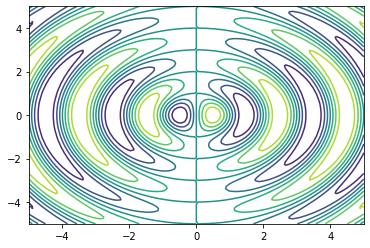

In [36]:
### BEGIN SOLUTION
E = x/r*np.sin(r*np.pi)
### END SOLUTION
%matplotlib inline
import matplotlib.pyplot as plt
plt.contour(x, y, E)

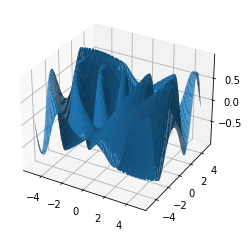

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(x, y, E)

In [38]:
from numpy.testing import assert_array_almost_equal
try:
    E
except NameError:
    raise NameError("Es gibt keine Variable 'E'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_almost_equal(E[0,:3], [ 1.56564647e-01, 1.60235697e-05, -1.51695015e-01 ], 4)
print("Sehr gut! 👏")

Sehr gut! 👏


## Numpy Arrays sind Reihen

Wir können alle Funktionen auf Numpy Arrays anwenden die für Reihen definiert sind:

In [39]:
a = np.arange(3)
len(a)

3

In [40]:
for x in a:
    print(x)

0
1
2


In [41]:
a[0]

0

### Slicing wählt Teile eines Arrays aus

Die **[Slicing](101%20-%20Grundlagen%20der%20Programmierung%20in%20Python.ipynb#Slicing)** Syntax von Reihen haben wir schon kennengelernt. Sie erlaubt uns, auf einzelne Elemente oder Teile einer Reihe zuzugreifen:

```python
a[start:stop:step]
```

Numpy erweitert diese Syntax auf mehrdimensionale Arrays:

```python
b[start:stop:step, start:stop:step]
```

In [42]:
x = np.arange(10)

In [43]:
x[:5]

array([0, 1, 2, 3, 4])

In [44]:
x[::2]

array([0, 2, 4, 6, 8])

Alternativ können wir statt einem Index auch eine **Liste von Indizes** in das Subskript schreiben und erhalten die zugehörigen Elemente aus dem Array:

In [45]:
x = np.array([ 1, 6, 4, 7, 9 ])
indices = [ 1, 0, 2, 1 ]
x[indices]

array([6, 1, 4, 6])

### Masking filtert ein Array

Außerdem erweitert Numpy diese Syntax um die **Masking** Funktionalität. Dabei geben wir im Subskript ein **Array von Booleans** an, welches die gleiche Länge hat, und erhalten nur die Elemente, für die wir `True` angegeben haben:

In [46]:
x = np.array([ 1, 6, 4, 7, 9 ])
mask = np.array([ True, True, False, False, True ])
x[mask]

array([1, 6, 9])

Masking ist deshalb äußerst praktisch, weil die **Vergleichsoperatoren** in Kombination mit Numpy Arrays wiederum Boolean Arrays zurückgeben:

In [47]:
x > 4

array([False,  True, False,  True,  True])

Somit können wir Teile eines Arrays herausfiltern, die einer **Bedingung** entsprechen:

In [48]:
x[x > 4]

array([6, 7, 9])

Bedingungen werden mit dem `&` Operator kombiniert:

In [49]:
x[(x > 4) & (x < 8)]

array([6, 7])

### Slices oder Masken eines Arrays kann auch zugewiesen werden

Wenn ein Slice oder eine Maske eines Arrays auf der linken Seite einer Zuweisung steht, wird diesem Teil des Original-Arrays zugewiesen:

In [50]:
x = np.array([ 1, 6, 4, 7, 9 ])
x[x > 4] = 0
x

array([1, 0, 4, 0, 0])

## Aufgabe 2 - Masken & Slicing

a) Gegeben ein Array `x` der Länge `n`, berechne das Array `dx` der Länge `n-1` mit den Werten `dx[i] = x[i+1] - x[i]`. Verwende keine Schleifen sondern Slicing!

**Hinweis:** Du musst zwei Arrays subtrahieren, von denen das eine der um 1 versetzte hintere und das andere der vordere Teil von `x` ist.

**Erinnerung:** Mit negativen Zahlen im Subskript wählst du Indizes vom Ende einer Reihe aus.

In [51]:
x = np.array([ 1, 1, 2, 3, 5, 8 ])
### BEGIN SOLUTION
dx = x[1:] - x[:-1]
### END SOLUTION

In [52]:
from numpy.testing import assert_array_equal
try:
    dx
except NameError:
    raise NameError("Es gibt keine Variable 'dx'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(dx, [0, 1, 1, 2, 3])
print("EZ 😉")

EZ 😉


b) Erstelle eine Maske `binary_donut`, die nur für Werte von `r` zwischen $5$ und $2$ `True` ist, und sonst `False`.

In [53]:
x, y = np.meshgrid(np.arange(-5, 6), np.arange(-5, 6))
r = np.sqrt(x**2 + y**2)
### BEGIN SOLUTION
binary_donut = (r > 2) & (r < 5)
### END SOLUTION
print(binary_donut)

[[False False False False False False False False False False False]
 [False False False  True  True  True  True  True False False False]
 [False False  True  True  True  True  True  True  True False False]
 [False  True  True  True  True False  True  True  True  True False]
 [False  True  True  True False False False  True  True  True False]
 [False  True  True False False False False False  True  True False]
 [False  True  True  True False False False  True  True  True False]
 [False  True  True  True  True False  True  True  True  True False]
 [False False  True  True  True  True  True  True  True False False]
 [False False False  True  True  True  True  True False False False]
 [False False False False False False False False False False False]]


In [54]:
from numpy.testing import assert_array_equal
try:
    binary_donut
except NameError:
    raise NameError("Es gibt keine Variable 'binary_donut'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(binary_donut[1,:], [False, False, False, True, True, True, True, True, False, False, False])
print("mhm 🍩!")

mhm 🍩!


c) Wähle aus `z` solche Werte, die der Maske `binary_donut` entsprechen, und weise sie der Variable `n` zu.

In [55]:
z = x + y
print(z)
### BEGIN SOLUTION
n = z[binary_donut]
### END SOLUTION
print(n)

[[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0]
 [ -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1]
 [ -8  -7  -6  -5  -4  -3  -2  -1   0   1   2]
 [ -7  -6  -5  -4  -3  -2  -1   0   1   2   3]
 [ -6  -5  -4  -3  -2  -1   0   1   2   3   4]
 [ -5  -4  -3  -2  -1   0   1   2   3   4   5]
 [ -4  -3  -2  -1   0   1   2   3   4   5   6]
 [ -3  -2  -1   0   1   2   3   4   5   6   7]
 [ -2  -1   0   1   2   3   4   5   6   7   8]
 [ -1   0   1   2   3   4   5   6   7   8   9]
 [  0   1   2   3   4   5   6   7   8   9  10]]
[-6 -5 -4 -3 -2 -6 -5 -4 -3 -2 -1  0 -6 -5 -4 -3 -1  0  1  2 -5 -4 -3  1
  2  3 -4 -3  3  4 -3 -2 -1  3  4  5 -2 -1  0  1  3  4  5  6  0  1  2  3
  4  5  6  2  3  4  5  6]


In [56]:
from numpy.testing import assert_array_equal
try:
    n
except NameError:
    raise NameError("Es gibt keine Variable 'n'. Weise das Array einer Variablen mit diesem Namen zu.")
assert_array_equal(n[:10], [-6, -5, -4, -3, -2, -6, -5, -4, -3, -2])
print("👌")

👌


## Daten einlesen und speichern

Mit der `numpy.loadtxt` Funktion können wir Daten aus einer Datei als Numpy Array einlesen:

In [57]:
data = np.loadtxt('data/temperatures.txt')
data.shape

(6679, 2)

Die Funktion gibt ein zweidimensionales Array mit den _Zeilen_ der eingelesenen Datei zurück. Alle Werte einer _Spalte_ können wir durch Slicing erhalten:

In [58]:
date = data[:,0] # Alle Zeilen, jeweils erste Spalte
T = data[:,1] # Alle Zeilen, jeweils zweite Spalte
date, T

(array([1995.00274, 1995.00548, 1995.00821, ..., 2013.27926, 2013.282  ,
        2013.28474]),
 array([ 0.944444, -1.61111 , -3.55556 , ..., 10.5556  ,  8.94444 ,
        11.1667  ]))

> **Hinweis:** Die `numpy.loadtxt` Funktion kann auch direkt ein Array für jede Spalte zurückgeben, wenn das Argument `unpack=True` übergeben wird:
>
> ```python
> date, T = np.loadtxt('data/temperatures.txt', unpack=True)
> ```
>
> Weitere praktische Optionen, wie die ersten Zeilen zu überspringen u.ä., findet ihr in der Dokumentation. Entfernt das '`#`'-Zeichen in der folgenden Zelle und schaut euch die Optionen mal an:

In [59]:
#np.loadtxt?

Mit der verwandten `np.savetxt` Funktion können wir Daten als Textdatei abspeichern:

In [60]:
#np.savetxt?

> **Hinweis:** Im Jupyter Notebook erhalten wir eine praktische Vorschau auf den Anfang einer Datei mit dem `!head path/to/file` Aufruf. Dies ist sehr hilfreich um die enthaltenen Daten zu prüfen, oder ob es Titelzeilen zu Überspringen gibt.

In [61]:
!more data\temperatures.txt

1995.00274 0.944444
1995.00548 -1.61111
1995.00821 -3.55556
1995.01095 -9.83333
1995.01369 -10.2222
1995.01643 -9.5
1995.01916 -10.2222
1995.02190 -6.61111
1995.02464 -2.94444
1995.02738 1.55556
1995.03012 0.277778
1995.03285 -1.44444
1995.03559 -3.61111
1995.03833 -6.22222
1995.04107 -1.55556
1995.04381 -4.94444
1995.04654 -8.38889
1995.04928 -6.55556
1995.05202 -1.5
1995.05476 -3.22222
1995.05749 -0.833333
1995.06023 6.38889
1995.06297 8.16667
1995.06571 3.61111
1995.06845 6.66667
1995.07118 10
1995.07392 0.5
1995.07666 5.44444
1995.07940 6.94444
1995.08214 4.94444
1995.08487 -0.5
1995.08761 1.61111
1995.09035 3.22222
1995.09309 1
1995.09582 2.77778
1995.09856 5.38889
1995.10130 6.22222
1995.10404 8.83333
1995.10678 7.66667
1995.10951 4.38889
1995.11225 2.55556
1995.11499 5.66667
1995.11773 5.5
1995.12047 4.27778
1995.12320 5.77778
1995.12594 5.72222
1995.12868 5.61111
1995.13142 7.11111
1995.13415 3.22222
1995.13689 5.33333
1995.13963 9.66667
1995.14237 8.88889
1995.14511 3.44444
19

1996.56674 15.7222
1996.56947 16.5556
1996.57221 19.2778
1996.57495 20.1111
1996.57769 20.5556
1996.58042 17.7222
1996.58316 19.1667
1996.58590 21.1667
1996.58864 19.9444
1996.59138 15.5556
1996.59411 14.3889
1996.59685 14.5556
1996.59959 14.1667
1996.60233 15.4444
1996.60507 17.9444
1996.60780 18.2778
1996.61054 19.7778
1996.61328 17.2778
1996.61602 14.5556
1996.61875 15.3889
1996.62149 15.8889
1996.62423 16.6111
1996.62697 15.5
1996.62971 16.2778
1996.63244 15.8889
1996.63518 18.5556
1996.63792 18.8889
1996.64066 18.2778
1996.64339 18.8333
1996.64613 18.4444
1996.64887 16.6667
1996.65161 16.0556
1996.65435 16.7778
1996.65708 17.1111
1996.65982 14.2222
1996.66256 15.2222
1996.66530 14.7222
1996.66804 13.6111
1996.67077 12.6111
1996.67351 12.2222
1996.67625 13.8333
1996.67899 14.6111
1996.68172 13.0556
1996.68446 10
1996.68720 8.55556
1996.68994 9.72222
1996.69268 9.88889
1996.69541 11.5556
1996.69815 11.7778
1996.70089 11.0556
1996.70363 7.83333
1996.70637 9.88889
1996.70910 10.0556
1

### Berechnungen zwischenspeichern mit `numpy.save`

Die `numpy.loadtxt` und `numpy.savetxt` Funktionen arbeiten mit Textdateien. Wenn ihr ein Numpy Array jedoch nur zwischenspeichern möchtet, bspw. das Ergebnis einer langen numerischen Berechnung, könnt ihr es auch mit `numpy.save` in einer `.npy` Binärdatei speichern:

In [62]:
# lange numerischen Berechnung hier
result = np.random.random(10)
print(result)
# Ergebnis zwischenspeichern
np.save('data/result.npy', result)


1997.29295 2.5
1997.29569 7.44444
1997.29843 5.72222
1997.30116 0.888889
1997.30390 0.833333
1997.30664 3.88889
1997.30938 5.11111
1997.31211 7.77778
1997.31485 11.5
1997.31759 10.7222
1997.32033 9.27778
1997.32307 12
1997.32580 9.66667
1997.32854 9.11111
1997.33128 9.94444
1997.33402 11.2778
1997.33676 16.1111
1997.33949 15.2778
1997.34223 14.3889
1997.34497 11.4444
1997.34771 6.11111
1997.35044 5.22222
1997.35318 7.88889
1997.35592 11.0556
1997.35866 15.0556
1997.36140 15.2778
1997.36413 16.5
1997.36687 19
1997.36961 19.6111
1997.37235 19.8889
1997.37509 19.6667
1997.37782 17.6667
1997.38056 16.8889
1997.38330 16.4444
1997.38604 15.6667
1997.38877 12.7778
1997.39151 13.1667
1997.39425 11.6111
1997.39699 10.7222
1997.39973 13.1111
1997.40246 13.7222
1997.40520 9.88889
1997.40794 11.5556
1997.41068 11.3889
1997.41342 8.72222
1997.41615 11.3889
1997.41889 14.2778
1997.42163 13.1111
1997.42437 14.7778
1997.42710 17.7222
1997.42984 17.8333
1997.43258 17.5
1997.43532 16.8333
1997.43806 18

Anstatt die Berechnung jedes mal erneut durchführen zu müssen, könnt ihr nun einfach mit `numpy.load` das zwischengespeicherte Ergebnis laden:

In [63]:
result = np.load('data/result.npy')
print(result)

[0.34423697 0.27045311 0.64791977 0.95708372 0.08543176 0.20323384
 0.46994163 0.62604061 0.31596738 0.16773742]
1997.73648 11.1111
1997.73922 11.9444
1997.74196 10.9444
1997.74470 12.6111
1997.74743 15.6667
1997.75017 15.0556
1997.75291 15.6111
1997.75565 8.83333
1997.75838 9.11111
1997.76112 10.6667
1997.76386 11.5556
1997.76660 14.1111
1997.76934 17.1667
1997.77207 19.9444
1997.77481 15.5
1997.77755 11.5556
1997.78029 9.61111
1997.78303 6.55556
1997.78576 5.38889
1997.78850 5.38889
1997.79124 5.44444
1997.79398 6.66667
1997.79671 5.66667
1997.79945 6.61111
1997.80219 7.44444
1997.80493 4.55556
1997.80767 2.66667
1997.81040 4.05556
1997.81314 3.33333
1997.81588 4.05556
1997.81862 4.55556
1997.82136 0.0555556
1997.82409 -1.38889
1997.82683 -1.44444
1997.82957 2.33333
1997.83231 2.77778
1997.83504 0.944444
1997.83778 1.77778
1997.84052 1.55556
1997.84326 1.83333
1997.84600 2.77778
1997.84873 11.1111
1997.85147 12
1997.85421 8.94444
1997.85695 4.44444
1997.85969 5.77778
1997.86242 6.055

> **Hinweis:** Diese Vorgehensweise kann viel Zeit sparen während ihr an einem Teil eures Programms arbeitet, das die numerische Berechnung nicht betrifft, bspw. die graphische Ausgabe als Plot.

## Aufgabe 3 - Temperaturen in Heidelberg

Die Datei `data/temperatures.txt` enthält Temperaturdaten aus Heidelberg von 1995 bis einschließlich 2012. Schaue dir die Struktur der Daten zunächst an:

In [64]:
!head data/temperatures.txt


1997.99110 2.5
1997.99384 0.777778
1997.99658 0.111111
1997.99932 0.777778
1998.00274 -0.166667
1998.00548 2.44444
1998.00821 7.11111
1998.01095 5.83333
1998.01369 4.61111
1998.01643 4.5
1998.01916 7.66667
1998.02190 7.22222
1998.02464 7.83333
1998.02738 2.44444
1998.03012 -0.388889
1998.03285 -1.11111
1998.03559 -2.66667
1998.03833 0
1998.04107 3.55556
1998.04381 4.11111
1998.04654 3.16667
1998.04928 0.444444
1998.05202 4.66667
1998.05476 0.722222
1998.05749 -0.555556
1998.06023 -1.66667
1998.06297 -0.5
1998.06571 -1.72222
1998.06845 -2.88889
1998.07118 -5.05556
1998.07392 -6.83333
1998.07666 -4.72222
1998.07940 -3.11111
1998.08214 -4.88889
1998.08487 -6.05556
1998.08761 -9.88889
1998.09035 -7.11111
1998.09309 -5.5
1998.09582 -6.27778
1998.09856 -5.5
1998.10130 -4.05556
1998.10404 -0.5
1998.10678 1.27778
1998.10951 1.11111
1998.11225 3.55556
1998.11499 4.44444
1998.11773 7.05556
1998.12047 10.0556
1998.12320 7.44444
1998.12594 7.11111
1998.12868 8.5
1998.13142 5.94444
1998.13415 4.72

Der Befehl "head" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


a) Lies die Daten mithilfe der `numpy.loadtxt` Funktion ein und weise die beiden Spalten zwei Variablen `date` und `T` zu.

In [65]:
date, T = np.loadtxt('data/temperatures.txt', unpack=True)

1999.10404 0.611111
1999.10678 -2.88889
1999.10951 -5.22222
1999.11225 -5.77778
1999.11499 -6
1999.11773 -9.83333
1999.12047 -5.55556
1999.12320 -4
1999.12594 -5.11111
1999.12868 -1.88889
1999.13142 -0.611111
1999.13415 -1.55556
1999.13689 3.38889
1999.13963 5.11111
1999.14237 4.38889
1999.14511 1.11111
1999.14784 -0.5
1999.15058 -0.888889
1999.15332 -3.55556
1999.15606 1.61111
1999.15880 4.11111
1999.16153 3.72222
1999.16427 5.55556
1999.16701 8.55556
1999.16975 9.77778
1999.17248 6.55556
1999.17522 3.16667
1999.17796 2.38889
1999.18070 0.777778
1999.18344 2.61111
1999.18617 4.66667
1999.18891 7.94444
1999.19165 4.38889
1999.19439 4.5
1999.19713 7.88889
1999.19986 7.88889
1999.20260 6.83333
1999.20534 3.27778
1999.20808 1.27778
1999.21081 0.555556
1999.21355 1.22222
1999.21629 2.66667
1999.21903 5.11111
1999.22177 5.5
1999.22450 3.61111
1999.22724 8.05556
1999.22998 9.66667
1999.23272 10.7222
1999.23546 9.55556
1999.23819 6
1999.24093 5.72222
1999.24367 6.11111
1999.24641 6.33333
1999

In [66]:
from numpy.testing import assert_array_almost_equal
try:
    date
except NameError:
    raise NameError("Es gibt keine Variable 'date'. Weise das Array einer Variablen mit diesem Namen zu.")
try:
    T
except NameError:
    raise NameError("Es gibt keine Variable 'T'. Weise das Array einer Variablen mit diesem Namen zu.")

assert_array_almost_equal(date[:3], [ 1995.00274, 1995.00548, 1995.00821], 4, "Das Array 'date' enthält nicht die richtigen Daten. Verwende die 'unpack=True' Funktion von 'numpy.loadtxt' wie im Hinweis oben.")
assert_array_almost_equal(T[:3], [ 0.944444, -1.61111, -3.55556], 4, "Das Array 'T' enthält nicht die richtigen Daten. Verwende die 'unpack=True' Funktion von 'numpy.loadtxt' wie im Hinweis oben.")
print("Daten eingelesen!")

Daten eingelesen!


b) Berechne für jedes Jahr von 1995 bis einschließlich 2012 die Durchschnittstemperatur, die minimale und die maximale Temperatur. Füge dabei der Liste `yearly_temperatures` für jedes Jahr eine Zeile mit dem Jahr und diesen drei Werten hinzu.

Die Datei enthält fehlerhafte Daten, die durch den Wert `+/-99` gekennzeichnet sind und nicht in die Berechnung mit einbezogen werden dürfen.

**Hinweis:** Gehe die Jahre in einer for-Schleife durch und verwende eine Maske für das Array `T`, sodass du nur die Temperaturdaten des entsprechenden Jahres als Slice erhälst. Darauf kannst du dann die Numpy Funktionen für den Mittelwert, das Minimum und das Maximum anwenden.

**Erinnerung:** Mehrere Masken kannst du mit dem `&`-Operator kombinieren.

In [67]:
!pip install -r requirements.txt


2000.47091 22.6111
2000.47365 24.7778
2000.47639 23.8333
2000.47912 16.1111
2000.48186 14.2222
2000.48460 12.6111
2000.48734 13.2222
2000.49008 13.2778
2000.49281 15.5556
2000.49555 16.0556
2000.49829 16.8889
2000.50103 20.3889
2000.50376 22.0556
2000.50650 19.7222
2000.50924 18.3889
2000.51198 18.8889
2000.51472 19.3889
2000.51745 17.2778
2000.52019 13.8333
2000.52293 13.5556
2000.52567 14.6667
2000.52841 13.9444
2000.53114 12.8889
2000.53388 12.8333
2000.53662 12.3889
2000.53936 11.1667
2000.54209 11.5556
2000.54483 13.8333
2000.54757 16.2222
2000.55031 15.2222
2000.55305 14.9444
2000.55578 16.9444
2000.55852 16.3889
2000.56126 16.9444
2000.56400 19.3333
2000.56674 19.9444
2000.56947 18.4444
2000.57221 19.6111
2000.57495 15.8889
2000.57769 15.7778
2000.58042 15
2000.58316 17.3333
2000.58590 19.2222
2000.58864 19.5
2000.59138 16.4444
2000.59411 15.6111
2000.59685 16.1111
2000.59959 15.3333
2000.60233 16.2778
2000.60507 17.4444
2000.60780 16.8889
2000.61054 19.6111
2000.61328 21.1111


2001.83231 12.7222
2001.83504 6.44444
2001.83778 4.94444
2001.84052 4.66667
2001.84326 5.11111
2001.84600 6.88889
2001.84873 6.38889
2001.85147 8.11111
2001.85421 9.27778
2001.85695 1.16667
2001.85969 -1.22222
2001.86242 -1.27778
2001.86516 -0.888889
2001.86790 1.38889
2001.87064 -1.11111
2001.87337 -2.27778
2001.87611 -1.83333
2001.87885 -0.333333
2001.88159 -0.111111
2001.88433 -1.05556
2001.88706 1.44444
2001.88980 1.72222
2001.89254 3.33333
2001.89528 -0.0555556
2001.89802 0.555556
2001.90075 1.94444
2001.90349 5.66667
2001.90623 5.66667
2001.90897 2.55556
2001.91170 4.05556
2001.91444 4.94444
2001.91718 2.72222
2001.91992 2.27778
2001.92266 0.222222
2001.92539 4.88889
2001.92813 6.61111
2001.93087 6.66667
2001.93361 2.44444
2001.93634 -0.722222
2001.93908 -3.33333
2001.94182 -3.38889
2001.94456 -0.611111
2001.94730 0.611111
2001.95003 -6.72222
2001.95277 -12.1667
2001.95551 -9.11111
2001.95825 -5.94444
2001.96099 -2.44444
2001.96372 -1.77778
2001.96646 -1.83333
2001.96920 -2.27778

2004.56947 15.8889
2004.57221 15.3889
2004.57495 15.6667
2004.57769 16.6667
2004.58042 19
2004.58316 21.7222
2004.58590 22.9444
2004.58864 21.3889
2004.59138 20.6111
2004.59411 21.1667
2004.59685 21.7222
2004.59959 22.2222
2004.60233 21.5
2004.60507 20.5556
2004.60780 20.7778
2004.61054 21.7778
2004.61328 21.9444
2004.61602 22.6111
2004.61875 18.5556
2004.62149 15.3889
2004.62423 18.0556
2004.62697 18.1111
2004.62971 19.6111
2004.63244 21.2222
2004.63518 20.6667
2004.63792 17.3333
2004.64066 14.9444
2004.64339 14.3889
2004.64613 16.1111
2004.64887 17.1667
2004.65161 17.7778
2004.65435 15.0556
2004.65708 16.2222
2004.65982 17.8889
2004.66256 17.4444
2004.66530 16.5556
2004.66804 15.8889
2004.67077 14.7778
2004.67351 15.4444
2004.67625 18.7222
2004.67899 20.3889
2004.68172 17.7778
2004.68446 17.5
2004.68720 16.5
2004.68994 16.0556
2004.69268 14.4444
2004.69541 14.4444
2004.69815 17.5
2004.70089 15.7778
2004.70363 14.5
2004.70637 16.3333
2004.70910 14.7222
2004.71184 12.8889
2004.71458 11

2006.79124 8.27778
2006.79398 4.22222
2006.79671 5.22222
2006.79945 9.27778
2006.80219 10.9444
2006.80493 11.7222
2006.80767 12.6111
2006.81040 13.7222
2006.81314 14.5556
2006.81588 10.2222
2006.81862 11.7222
2006.82136 14.9444
2006.82409 14.8889
2006.82683 13.6111
2006.82957 8.77778
2006.83231 11.1111
2006.83504 7.27778
2006.83778 0.722222
2006.84052 1.05556
2006.84326 3.61111
2006.84600 5.66667
2006.84873 5.88889
2006.85147 3.5
2006.85421 7.88889
2006.85695 10
2006.85969 3.38889
2006.86242 4.27778
2006.86516 6.16667
2006.86790 7.5
2006.87064 10.8889
2006.87337 10.2222
2006.87611 6.38889
2006.87885 6.88889
2006.88159 7.55556
2006.88433 5.55556
2006.88706 5.77778
2006.88980 6.27778
2006.89254 4.05556
2006.89528 2.94444
2006.89802 7.66667
2006.90075 5.94444
2006.90349 4.77778
2006.90623 4.05556
2006.90897 3.77778
2006.91170 3.05556
2006.91444 5.77778
2006.91718 4.72222
2006.91992 1.27778
2006.92266 1.94444
2006.92539 6.44444
2006.92813 10.4444
2006.93087 4.88889
2006.93361 5.61111
2006.

2010.04107 -2.55556
2010.04381 -3.11111
2010.04654 1.94444
2010.04928 2.44444
2010.05202 -0.777778
2010.05476 -0.555556
2010.05749 -0.833333
2010.06023 -1.38889
2010.06297 -2.77778
2010.06571 -4.5
2010.06845 -3.44444
2010.07118 -5.61111
2010.07392 -9.33333
2010.07666 -1.88889
2010.07940 0.111111
2010.08214 -1.55556
2010.08487 -3.94444
2010.08761 -2.77778
2010.09035 -0.166667
2010.09309 3.22222
2010.09582 2.16667
2010.09856 -0.388889
2010.10130 1.38889
2010.10404 -0.388889
2010.10678 -4.77778
2010.10951 -5.77778
2010.11225 -5.88889
2010.11499 -6.22222
2010.11773 -5.83333
2010.12047 -4.38889
2010.12320 -4.83333
2010.12594 -5.38889
2010.12868 -6.38889
2010.13142 -3.44444
2010.13415 -2.16667
2010.13689 -0.111111
2010.13963 0.777778
2010.14237 1.38889
2010.14511 0.277778
2010.14784 3.33333
2010.15058 5.22222
2010.15332 6.55556
2010.15606 6.11111
2010.15880 6.11111
2010.16153 7.38889
2010.16427 6.61111
2010.16701 1.72222
2010.16975 -0.277778
2010.17248 0.555556
2010.17522 -2.5
2010.17796 -2.

2011.40794 15.6111
2011.41068 18.9444
2011.41342 18.6667
2011.41615 12.2222
2011.41889 13.5
2011.42163 18.0556
2011.42437 20.7222
2011.42710 20.5
2011.42984 17.1667
2011.43258 18.6111
2011.43532 15.7778
2011.43806 14.2222
2011.44079 15.1111
2011.44353 13.8889
2011.44627 15.5
2011.44901 15.3889
2011.45175 17.5
2011.45448 20.2778
2011.45722 20.7778
2011.45996 17.8889
2011.46270 13.8889
2011.46543 13.2222
2011.46817 15.1111
2011.47091 20.5556
2011.47365 20.4444
2011.47639 15.6667
2011.47912 14.5556
2011.48186 14.0556
2011.48460 17.8889
2011.48734 21.3889
2011.49008 21.7778
2011.49281 21.9444
2011.49555 16.2778
2011.49829 12.3889
2011.50103 13.0556
2011.50376 13.1667
2011.50650 17.0556
2011.50924 19.5
2011.51198 22
2011.51472 21.1111
2011.51745 18.2222
2011.52019 20.8889
2011.52293 19.6111
2011.52567 19.6667
2011.52841 21.0556
2011.53114 20.0556
2011.53388 15
2011.53662 16
2011.53936 17.1667
2011.54209 17.2778
2011.54483 14.2778
2011.54757 17.6111
2011.55031 12.8333
2011.55305 16.1667
2011

2012.77755 7.88889
2012.78029 6.66667
2012.78303 9.88889
2012.78576 7.55556
2012.78850 9.33333
2012.79124 7.11111
2012.79398 7.66667
2012.79671 9.88889
2012.79945 9.44444
2012.80219 11.2778
2012.80493 9.05556
2012.80767 8.83333
2012.81040 8.16667
2012.81314 7.88889
2012.81588 8.55556
2012.81862 8.22222
2012.82136 7.27778
2012.82409 2.16667
2012.82683 -0.444444
2012.82957 -0.388889
2012.83231 2.27778
2012.83504 3.11111
2012.83778 6.83333
2012.84052 7.83333
2012.84326 9.66667
2012.84600 8.55556
2012.84873 7.05556
2012.85147 4.55556
2012.85421 4.83333
2012.85695 4.44444
2012.85969 5.88889
2012.86242 5.16667
2012.86516 7.44444
2012.86790 7.61111
2012.87064 5.61111
2012.87337 5
2012.87611 3.77778
2012.87885 1.5
2012.88159 0.444444
2012.88433 0.777778
2012.88706 1.11111
2012.88980 2.44444
2012.89254 2.83333
2012.89528 4.05556
2012.89802 4.44444
2012.90075 4.27778
2012.90349 8.61111
2012.90623 7.44444
2012.90897 6.22222
2012.91170 4.66667
2012.91444 1.55556
2012.91718 -0.222222
2012.91992 -3.

In [68]:
yearly_temperatures = []
### BEGIN SOLUTION
for year in range(1995, 2013):
    temperatures = T[(date >= year) & (date < year + 1) & (np.abs(T) != 99)]
    yearly_temperatures.append([year, np.mean(temperatures), np.min(temperatures), np.max(temperatures)])
### END SOLUTION
from tabulate import tabulate
print(tabulate(yearly_temperatures, headers=["Jahr", "Durchschnitt [°C]", "Minimal [°C]", "Maximal [°C]"]))

  Jahr    Durchschnitt [°C]    Minimal [°C]    Maximal [°C]
------  -------------------  --------------  --------------
  1995              8.7656        -13.2778          25.9444
  1996              7.22983       -15.5             23.8333
  1997              8.54842       -12.8889          21.5556
  1998              9.2457        -12.2222          25.5
  1999              9.11065        -9.83333         25.3333
  2000              9.76545       -16.7778          24.7778
  2001              9.00713       -12.1667          24.5556
  2002              9.88171       -11.1111          25.1111
  2003              9.39833       -14.3333          27.6667
  2004              8.87702       -10.7778          23
  2005              8.22475       -14.1111          25.1111
  2006              9.16377       -11.2778          25.9444
  2007              9.76865        -8.83333         26.2778
  2008              9.66087        -5.11111         24.0556
  2009              9.3723        -10.7778      

In [69]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(yearly_temperatures[0], [ 1995, 8.7656, -13.2778, 25.9444 ], 4, "Die Daten sind nicht richtig. Überprüfe, ob jedes Element der Liste 'yearly_temperatures' wiederum eine Liste mit den Werten Jahr, Durchschnittstemperatur, Minimum und Maximum ist und du die fehlerhaften Werte +/-99 herausgefiltert hast.")
print("Ganz schön warm, oder? ☀️🌴😅")

Ganz schön warm, oder? ☀️🌴😅


c) Berechne diese Daten analog aufgeteilt in Monate statt Jahre, also bspw. die Durschnittstemperatur im Januar im ganzen gemessenen Zeitraum.

**Hinweis:** Den Zeitpunkt innerhalb eines Jahres, wobei `0` dem Jahresanfang und `1` dem Jahresende entspricht, erhälst du mit dem Modulo Operator: `date % 1`

In [70]:
monthly_temperatures = []
### BEGIN SOLUTION
for month in range(0, 12):
    temperatures = T[(date % 1 >= month / 12) & (date % 1 < (month + 1) / 12) & (np.abs(T) != 99)]
    monthly_temperatures.append([month + 1, np.mean(temperatures), np.min(temperatures), np.max(temperatures)])
### END SOLUTION
from tabulate import tabulate
print(tabulate(monthly_temperatures, headers=["Monat", "Durchschnitt [°C]", "Minimal [°C]", "Maximal [°C]"]))

  Monat    Durchschnitt [°C]    Minimal [°C]    Maximal [°C]
-------  -------------------  --------------  --------------
      1            -0.8494         -16.7778          12.2222
      2             0.662865       -15.4444          11.9444
      3             4.47399         -7.66667         16.2778
      4             9.27625         -2.11111         20.7222
      5            13.9793           5.22222         23.1667
      6            17.2042           7.77778         25.1111
      7            18.4592          10.5             26.2778
      8            18.2187           9.5             27.6667
      9            13.7085           3.88889         22.7222
     10             9.38013         -1.44444         20.5
     11             3.74218         -7.11111         14.1667
     12             0.220317       -15.5             11.2778


In [71]:
from numpy.testing import assert_array_almost_equal
assert_array_almost_equal(monthly_temperatures[0][1:], [ -0.8494, -16.7778, 12.2222 ], 4, "Die Daten sind nicht richtig. Überprüfe, ob jedes Element der Liste 'monthly_temperatures' wiederum eine Liste mit den Werten Monat, Durchschnittstemperatur, Minimum und Maximum ist und du die fehlerhaften Werte +/-99 herausgefiltert hast.")
print("👍 Sieht richtig aus.")

👍 Sieht richtig aus.


---

Du kannst jetzt Daten einlesen und mit Numpy analysieren. Lerne in der nächsten Lektion, wie du mit _Matplotlib_ wissenschaftlich plotten kannst.

[Startseite](index.ipynb) | [**>> 05 - Plots mit Matplotlib**](202%20-%20Plots%20mit%20Matplotlib.ipynb)